In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [2]:
import pandas as pd

train = pd.read_csv("D:\\Collage\\Trainings\\DEPI\\Teachnical\\sign_mnist_train.csv")
test = pd.read_csv("D:\\Collage\\Trainings\\DEPI\\Teachnical\\sign_mnist_test.csv")



In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
labels=train['label'].values
train.drop('label',axis=1,inplace=True)
train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [5]:
train_images=train.values
train_images=np.array([np.reshape(i,(28,28)) for i in train_images])
#train_images=np.array([i.flatten() for i in train_images])
train_images.shape

(27455, 28, 28)

In [6]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer=LabelBinarizer()
labels=label_binarizer.fit_transform(labels)
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

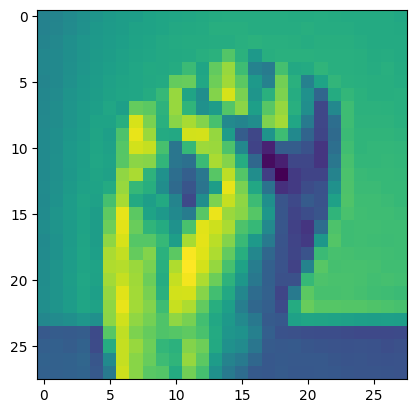

In [7]:
plt.imshow(train_images[10].reshape(28,28))

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_images,labels,test_size=0.2,random_state=49)

In [9]:
x_train=x_train/255
x_test=x_test/255

In [10]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [11]:
model=Sequential()

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(24,activation='softmax'))


c:\Program Files\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test),batch_size=128)

Epoch 1/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 16s 79ms/step - accuracy: 0.2103 - loss: 2.5896 - val_accuracy: 0.5057 - val_loss: 1.6408
Epoch 2/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 13s 74ms/step - accuracy: 0.5809 - loss: 1.2342 - val_accuracy: 0.7297 - val_loss: 0.8388
Epoch 3/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 21s 77ms/step - accuracy: 0.7385 - loss: 0.7443 - val_accuracy: 0.8357 - val_loss: 0.5078
Epoch 4/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 14s 78ms/step - accuracy: 0.8366 - loss: 0.4712 - val_accuracy: 0.8998 - val_loss: 0.2968
Epoch 5/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.8900 - loss: 0.3181 - val_accuracy: 0.9415 - val_loss: 0.1861
Epoch 6/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 13s 77ms/step - accuracy: 0.9272 - loss: 0.2174 - val_accuracy: 0.9608 - val_loss: 0.1412
Epoch 7/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.9515 - loss: 0.1516 - val_accuracy: 0.9814 - val_loss: 0.0767
Epoch 8/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step - accuracy: 0.9695 - loss: 0.1023 - 

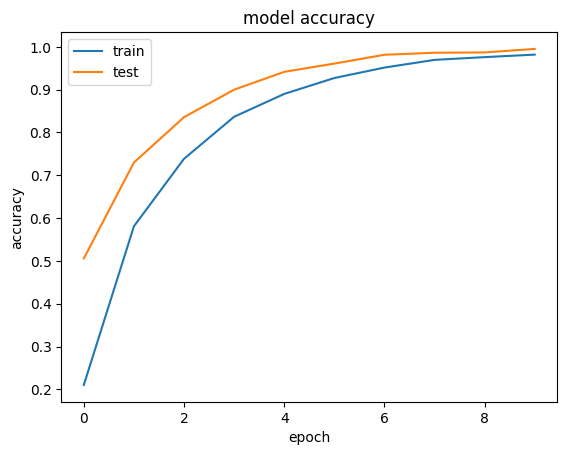

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [21]:
test_labels=test['label'].values
test_labels=label_binarizer.fit_transform(test_labels)
test.drop('label',axis=1,inplace=True)
test_images=test.values
test_images=np.array([np.reshape(i,(28,28)) for i in test_images])

In [22]:
y_predict=model.predict(test_images)


225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(np.argmax(y_predict,axis=1),np.argmax(test_labels,axis=1))

0.8015895147796989

## LEt's try improving it 

In [13]:
print(y_train.shape, y_test.shape)
print(np.unique(np.argmax(y_train, axis=1)))


(21964, 24) (5491, 24)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [20]:
print("x_train min/max:", x_train.min(), x_train.max())
print("x_train dtype:", x_train.dtype)


x_train min/max: 0.0 1.0
x_train dtype: float64


In [10]:


model=Sequential()

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(24,activation='softmax'))




c:\Program Files\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:

# Data augmentation for creating diffrent versions of data so the model perform better
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

datagen.fit(x_train)  

# Learning rate reduce for more improvements 
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7)

In [14]:
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=128),
    epochs=20,
    validation_data=(x_test, y_test),
    callbacks=[reduce_lr]

)

c:\Program Files\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 58s 303ms/step - accuracy: 0.0932 - loss: 3.5050 - val_accuracy: 0.0787 - val_loss: 3.2614 - learning_rate: 0.0010
Epoch 2/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 50s 290ms/step - accuracy: 0.1694 - loss: 2.7705 - val_accuracy: 0.1082 - val_loss: 3.1496 - learning_rate: 0.0010
Epoch 3/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 51s 299ms/step - accuracy: 0.2473 - loss: 2.3821 - val_accuracy: 0.2149 - val_loss: 2.4722 - learning_rate: 0.0010
Epoch 4/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 51s 297ms/step - accuracy: 0.3107 - loss: 2.1164 - val_accuracy: 0.5830 - val_loss: 1.3762 - learning_rate: 0.0010
Epoch 5/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 54s 311ms/step - accuracy: 0.3788 - loss: 1.8840 - val_accuracy: 0.5968 - val_loss: 1.2142 - learning_rate: 0.0010
Epoch 6/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 53s 309ms/step - accuracy: 0.4302 - loss: 1.7120 - val_accuracy: 0.7064 - val_loss: 0.9579 - learning_rate: 0.0010
Epoch 7/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 53s 309ms/step - accuracy: 0.4

In [15]:
# Good but tends to overfit

val_loss, val_acc = model.evaluate(x_test, y_test)
print(f"Validation Accuracy: {val_acc*100:.2f}%")

172/172 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8986 - loss: 0.3126
Validation Accuracy: 89.86%


### Try with less neutrons and arguments 

In [11]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    fill_mode="nearest"
)
datagen.fit(x_train)

# Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(24, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Training
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=20,  
    
    validation_data=(x_test, y_test),
    callbacks=[reduce_lr]
)


c:\Program Files\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Program Files\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.3660 - loss: 2.1171 - val_accuracy: 0.7556 - val_loss: 0.7996 - learning_rate: 0.0010
Epoch 2/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - accuracy: 0.6922 - loss: 0.9674 - val_accuracy: 0.9026 - val_loss: 0.3212 - learning_rate: 0.0010
Epoch 3/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.8050 - loss: 0.6236 - val_accuracy: 0.9517 - val_loss: 0.2027 - learning_rate: 0.0010
Epoch 4/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - accuracy: 0.8523 - loss: 0.4628 - val_accuracy: 0.9634 - val_loss: 0.1476 - learning_rate: 0.0010
Epoch 5/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.8875 - loss: 0.3568 - val_accuracy: 0.9785 - val_loss: 0.0876 - learning_rate: 0.0010
Epoch 6/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 15s 45ms/step - accuracy: 0.9062 - loss: 0.2903 - val_accuracy: 0.9918 - val_loss: 0.0503 - learning_rate: 0.0010
Epoch 7/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - accuracy: 0.9224 - l

In [12]:
# MOdel wvaluation
val_loss, val_accuracy = model.evaluate(x_test, y_test, verbose=1)

print(f"Test Loss: {val_loss:.4f}")
print(f"Test Accuracy: {val_accuracy*100:.2f}%")


172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9993 - loss: 0.0041
Test Loss: 0.0041
Test Accuracy: 99.93%


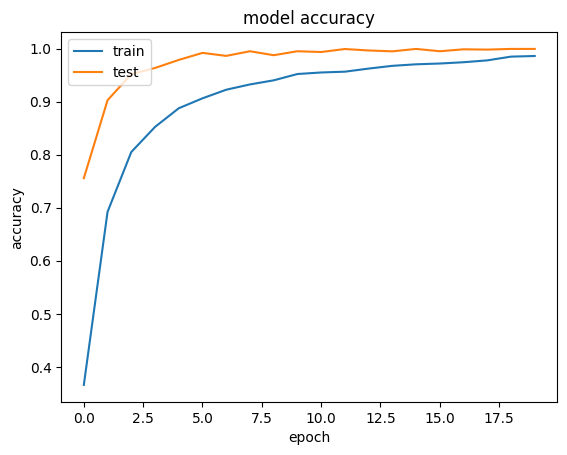

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

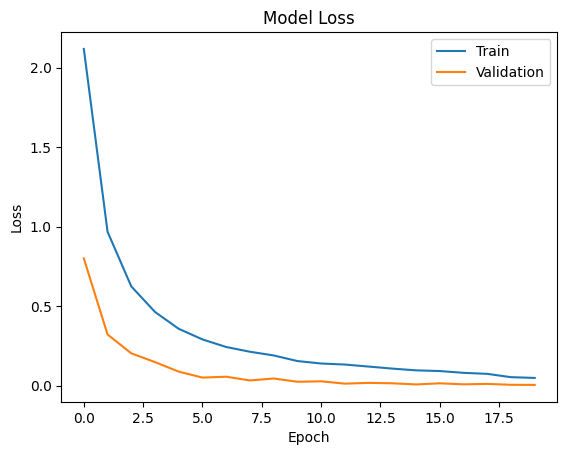

In [14]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
